<a href="https://colab.research.google.com/github/DangMinh21/CS114.L22.KHCL/blob/main/Do_an_cuoi_ki/featureExrtractionHOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog

In [34]:
# lấy địa chỉ ảnh và label tương ướng của dữ liệu được lưu trên drive
FJoin = os.path.join
def getLinkImg(path):
    linkImgs = []
    labels = []
    # duyệt từng folder, mỗi folder chứa 1 chữ
    characterFolders = [FJoin(path, f) for f in os.listdir(path)]
    for folder in characterFolders:
        # duyệt qua mọi chữ trong folder
        label = folder.split('/')[-1]
        label = int(label)
        imgs = [FJoin(folder, img) for img in os.listdir(folder)]
        for img in imgs:
            linkImgs.append(img)
            labels.append(label)
    return linkImgs, labels

In [35]:
# load data
train_path = '/content/drive/MyDrive/Colab Notebooks/dataML/TrainData'
test_path = '/content/drive/MyDrive/Colab Notebooks/dataML/TestData'
x_train, y_train = getLinkImg(train_path)
x_test, y_test = getLinkImg(test_path)
print(f'size train: {len(x_train)}')
print(f'size test: {len(x_test)}')

size train: 26279
size test: 8760


In [43]:
label_dict = dict()
labels = []
with open('/content/drive/MyDrive/Colab Notebooks/dataML/KiTu_So.txt', 'r') as f:
  lines = f.readlines()
for line in lines:
  l = line.split()
  label_dict[int(l[0])] = l[1]
  labels.append(l[1])
print('label tương ứng: ')
print(label_dict)
print(labels)

label tương ứng: 
{1: 'a', 2: 'á', 3: 'à', 4: 'ả', 5: 'ạ', 6: 'ã', 7: 'ă', 8: 'ắ', 9: 'ằ', 10: 'ẳ', 11: 'ặ', 12: 'ẵ', 13: 'â', 14: 'ấ', 15: 'ầ', 16: 'ẩ', 17: 'ậ', 18: 'ẫ', 19: 'b', 20: 'c', 21: 'd', 22: 'đ', 23: 'e', 24: 'é', 25: 'è', 26: 'ẻ', 27: 'ẹ', 28: 'ẽ', 29: 'ê', 30: 'ế', 31: 'ề', 32: 'ể', 33: 'ệ', 34: 'ễ', 35: 'g', 36: 'h', 37: 'i', 38: 'í', 39: 'ì', 40: 'ỉ', 41: 'ị', 42: 'ĩ', 43: 'k', 44: 'l', 45: 'm', 46: 'n', 47: 'o', 48: 'ó', 49: 'ò', 50: 'ỏ', 51: 'ọ', 52: 'õ', 53: 'ô', 54: 'ố', 55: 'ồ', 56: 'ổ', 57: 'ộ', 58: 'ỗ', 59: 'ơ', 60: 'ớ', 61: 'ờ', 62: 'ở', 63: 'ợ', 64: 'ỡ', 65: 'p', 66: 'q', 67: 'r', 68: 's', 69: 't', 70: 'u', 71: 'ú', 72: 'ù', 73: 'ủ', 74: 'ụ', 75: 'ũ', 76: 'ư', 77: 'ứ', 78: 'ừ', 79: 'ử', 80: 'ự', 81: 'ữ', 82: 'v', 83: 'x', 84: 'y', 85: 'ý', 86: 'ỳ', 87: 'ỹ', 88: 'ỷ', 89: 'ỵ'}
['a', 'á', 'à', 'ả', 'ạ', 'ã', 'ă', 'ắ', 'ằ', 'ẳ', 'ặ', 'ẵ', 'â', 'ấ', 'ầ', 'ẩ', 'ậ', 'ẫ', 'b', 'c', 'd', 'đ', 'e', 'é', 'è', 'ẻ', 'ẹ', 'ẽ', 'ê', 'ế', 'ề', 'ể', 'ệ', 'ễ', 'g', 'h', 'i', 'í'

size: (16, 16)
mode: L


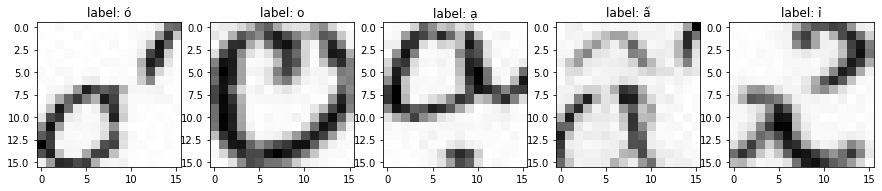

In [57]:
# show một vài bức ảnh trong tập train
imgs = [1, 500, 1000, 5000, 8000]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for ax, img in zip(axes, imgs):
    im = Image.open(x_train[img])
    ax.imshow(im, cmap='gray')
    ax.set_title('label: {}'.format(label_dict[int(y_train[img])]))
  
img = Image.open(x_train[0])
print(f'size: {img.size}\nmode: {img.mode}')

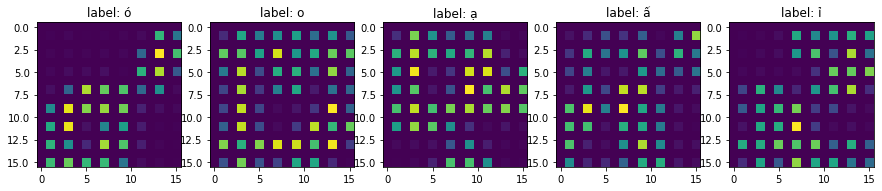

In [58]:
# chuyen anh qua HOG va visualize
imgs = [1, 500, 1000, 5000, 8000]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for ax, img in zip(axes, imgs):
    im = Image.open(x_train[img])
    feature, HOG_img = hog(im, pixels_per_cell=(2,2), cells_per_block=(2,2), visualize=True)
    ax.imshow(HOG_img)
    ax.set_title('label: {}'.format(label_dict[int(y_train[img])]))

In [65]:
def getFeatureHog(imgs):
    # list luu tat ca anh sau khi da xu li
    HOGfeatures = []
    for img in imgs:
        img = Image.open(img)
        HOGfearture = hog(img, pixels_per_cell=(2,2), cells_per_block=(2,2))
        HOGfeatures.append(HOGfearture)
    return np.array(HOGfeatures)

In [66]:
x_train_hog = getFeatureHog(x_train)
x_test_hog = getFeatureHog(x_test)
print(f'x train hog size: {x_train_hog.shape}\nx test hog size: {x_test_hog.shape}')

x train hog size: (26279, 1764)
x test hog size: (8760, 1764)


In [71]:
# luu vao file csv
pd.DataFrame(x_train_hog).to_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/x_train_hog.csv', header= None, index=None)
pd.DataFrame(x_test_hog).to_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/x_test_hog.csv', header= None, index=None)
pd.DataFrame(y_train).to_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/y_train_hog.csv', header= None, index=None)
pd.DataFrame(y_test).to_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_HOG/y_test_hog.csv', header= None, index=None)